$\textbf{DISCRETE MATHEMATICS II || Lecture 4 Assignment}$

<p>
<b>Name: </b>Sharly Pia Rose S. Barago<br>
<b>Program and Year: </b>BSCS - 1<br>
<b>Date:</b> May 14, 2024
</p>

---

### $\textbf{Assignment}$

Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

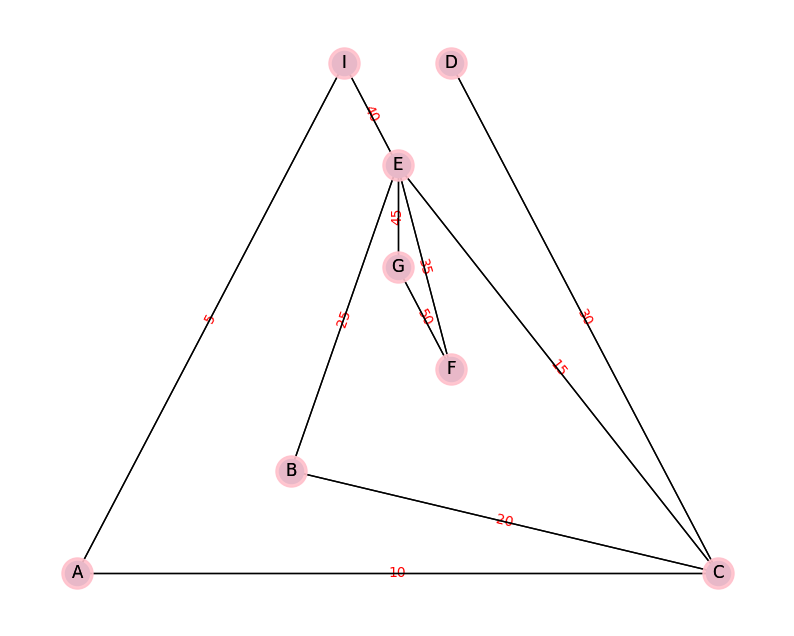

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

---

### $\textbf{1. Kruskal's Algorithm}$


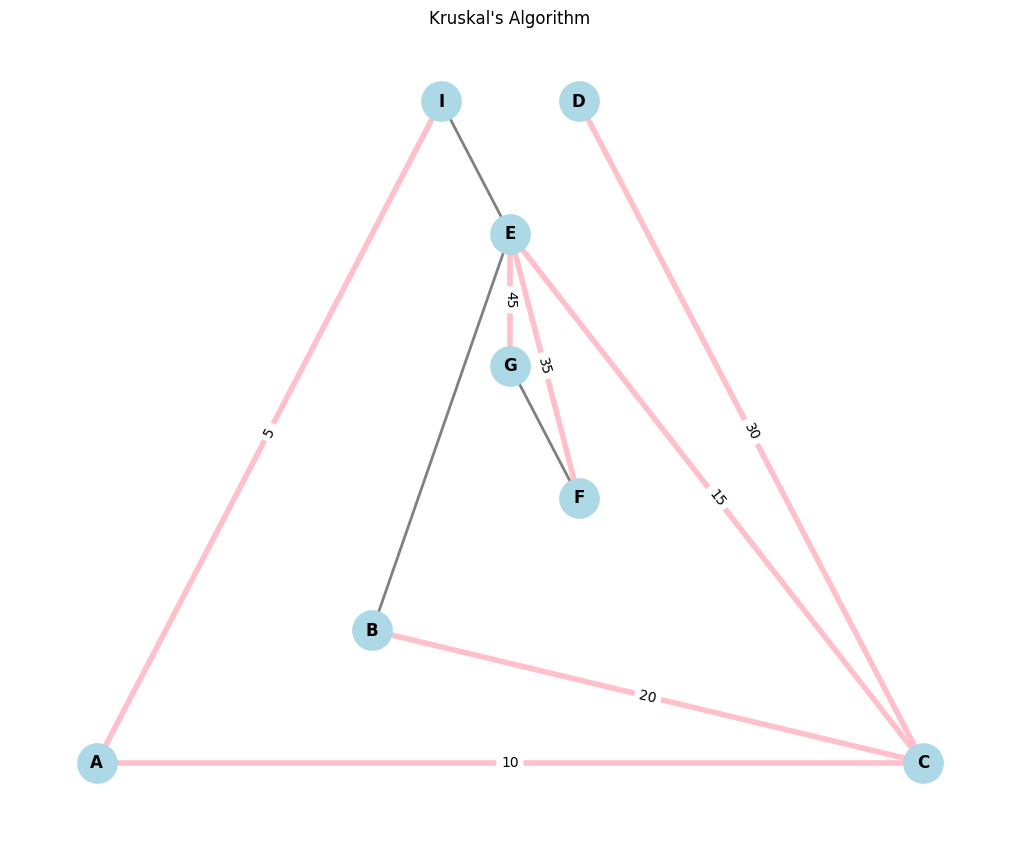

In [107]:
import networkx as nx
import matplotlib.pyplot as plt

def kruskal_algorithm(G):
    MST = nx.Graph()
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    disjoint_set = {node: {node} for node in G.nodes()}
    
    for u, v, data in sorted_edges:
        if find(disjoint_set, u)!= find(disjoint_set, v):
            MST.add_edge(u, v, **data)
            union(disjoint_set, u, v)
    
    return MST

def find(disjoint_set, node):
    for k, v in disjoint_set.items():
        if node in v:
            return k

def union(disjoint_set, u, v):
    root_u = find(disjoint_set, u)
    root_v = find(disjoint_set, v)
    if root_u!= root_v:
        disjoint_set[root_u].update(disjoint_set[root_v])
        del disjoint_set[root_v]

G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])
edgelist = [
    ("A", "C", 10),
    ("A", "I", 5),
    ("C", "B", 20),
    ("C", "E", 15),
    ("C", "D", 30),
    ("B", "E", 25),
    ("I", "E", 40),
    ("E", "F", 35),
    ("F", "G", 50),
    ("G", "E", 45)
]
G.add_weighted_edges_from(edgelist)

mst = kruskal_algorithm(G)
pos = nx.planar_layout(G)

nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray', width=2)

# Use a different color for MST edges to distinguish them
nx.draw_networkx_edges(mst, pos=pos, edge_color='pink', width=4)

# Draw edge labels for MST edges
mst_edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos=pos, edge_labels=mst_edge_labels, font_color='black')

plt.title("Kruskal's Algorithm")
plt.show()


<b>Solution: </b>

| Iteration Number | Edge Considered | Weight | Action Taken |
| :-: | :-: | :-: | :-: |
| 1 | (A, I) | 5 | connected |
| 2 | (A, C) | 10 | connected |
| 3 | (C, E) | 15 | connected |
| 4 | (B, C) | 20 | connected |
| 5 | (B, E) | 25 | not connected |
| 6 | (C, D) | 30 | connected |
| 7 | (E, F) | 35 | connected |
| 8 | (E, I) | 40 | not connected |
| 9 | (E, G) | 45 | connected |
| 10 | (F, G) | 50 | not connected |

---

### $\textbf{2. Prim's Algorithm}$


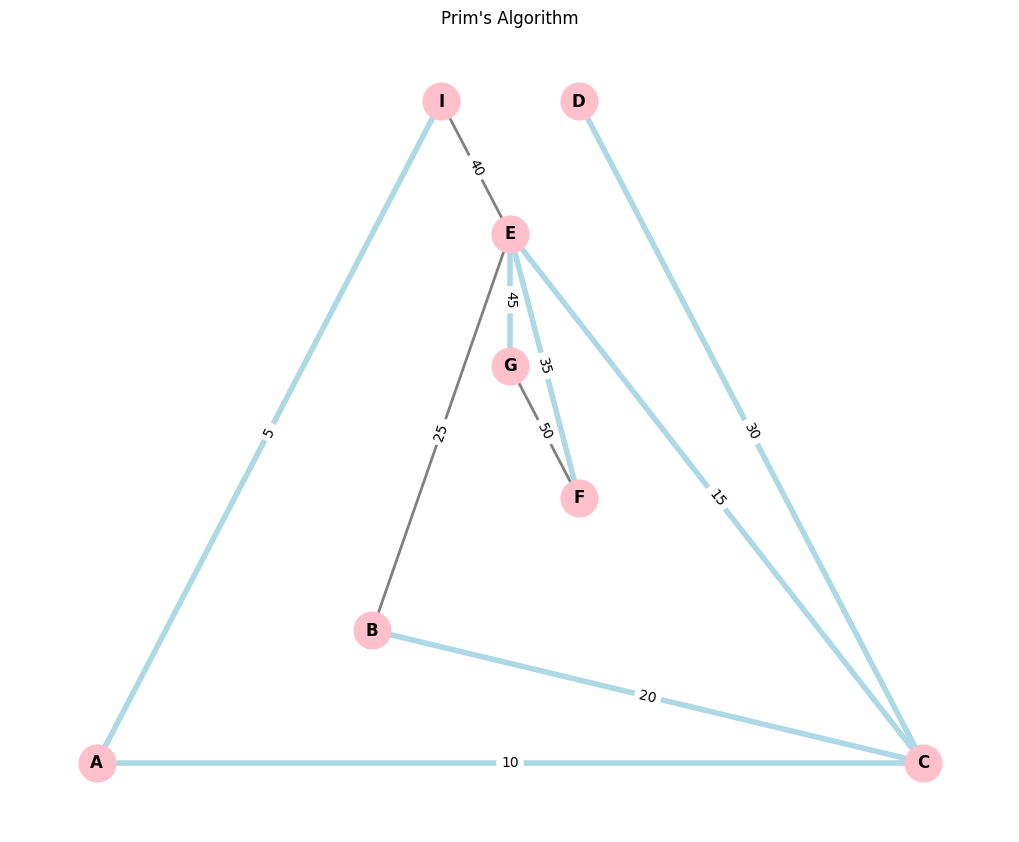

In [108]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def prim(graph):
    mst = nx.Graph(graph)
    MST = nx.Graph()
    start_node = random.choice(list(mst.nodes()))
    visited = {start_node}
    
    while len(visited) < len(mst.nodes()):
        min_edge = None
        min_weight = float('inf')
        for u in visited:
            for v in mst.neighbors(u):
                if v not in visited and mst[u][v]['weight'] < min_weight:
                    min_edge = (u, v)
                    min_weight = mst[u][v]['weight']
        
        u, v = min_edge
        MST.add_edge(u, v, weight=min_weight)
        
        visited.add(v)
    
    return MST

G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A","B","C","D","E","F","G","I"])
edgelist = [
    ("A", "C", 10), 
    ("A", "I", 5), 
    ("C", "B", 20), 
    ("C", "E", 15), 
    ("C", "D", 30), 
    ("B", "E", 25), 
    ("I", "E", 40), 
    ("E", "F", 35), 
    ("F", "G", 50), 
    ("G", "E", 45)
]
G.add_weighted_edges_from(edgelist)

MST = prim(G)
pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='pink', font_size=12, font_weight='bold', edge_color='gray', width=2)

nx.draw_networkx_edges(MST, pos=pos, edge_color='lightblue', width=4)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='black')

plt.title("Prim's Algorithm")
plt.show()


---

### $\textbf{3. Djitraka's Shortest Path Algorithm Algorithm}$


Shortest Paths and Lengths:
From node A:
  Shortest path to A: Distance: 0
  Shortest path to B: Distance: 30
  Shortest path to C: Distance: 10
  Shortest path to D: Distance: 40
  Shortest path to E: Distance: 25
  Shortest path to F: Distance: 60
  Shortest path to G: Distance: 70
  Shortest path to I: Distance: 5
From node B:
  Shortest path to A: Distance: 30
  Shortest path to B: Distance: 0
  Shortest path to C: Distance: 20
  Shortest path to D: Distance: 50
  Shortest path to E: Distance: 25
  Shortest path to F: Distance: 60
  Shortest path to G: Distance: 70
  Shortest path to I: Distance: 35
From node C:
  Shortest path to A: Distance: 10
  Shortest path to B: Distance: 20
  Shortest path to C: Distance: 0
  Shortest path to D: Distance: 30
  Shortest path to E: Distance: 15
  Shortest path to F: Distance: 50
  Shortest path to G: Distance: 60
  Shortest path to I: Distance: 15
From node D:
  Shortest path to A: Distance: 40
  Shortest path to B: Distance: 50
  Shortest pat

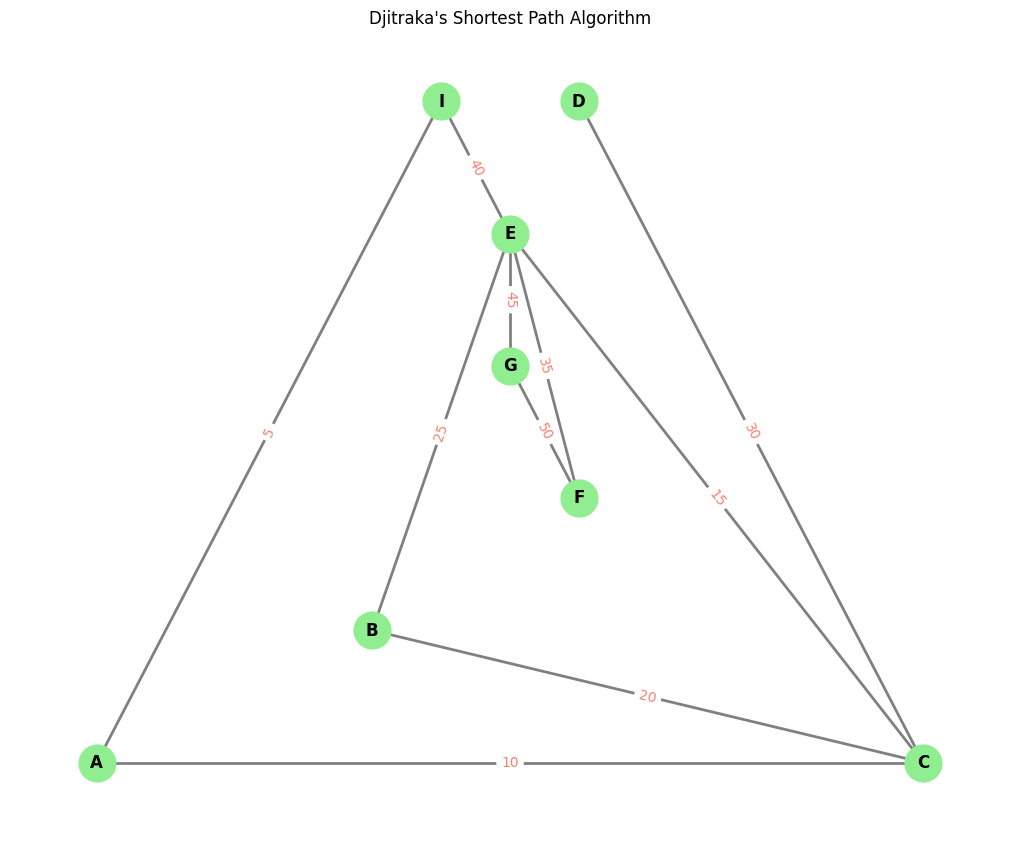

In [105]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, start):
    distance = {node: float('inf') for node in graph.nodes()}
    distance[start] = 0
    visited = set()
    
    while len(visited) < len(graph.nodes()):
        current_node = min((node for node in graph.nodes() if node not in visited), key=lambda x: distance[x])
        visited.add(current_node)
        
        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_distance = distance[current_node] + graph[current_node][neighbor].get('weight', 1)
                if new_distance < distance[neighbor]:
                    distance[neighbor] = new_distance
    
    return distance

G = nx.Graph()

nodes = ["A", "B", "C", "D", "E", "F", "G", "I"]
G.add_nodes_from(nodes)
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

shortest_distances = {}
for start_node in nodes:
    distances = dijkstra(G, start_node)
    shortest_distances[start_node] = distances

plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_size=700, node_color='lightgreen', font_size=12, font_weight='bold', edge_color='gray', width=2)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='salmon')

print("Shortest Paths and Lengths:")
for node in nodes:
    print(f"From node {node}:")
    distances = shortest_distances[node]
    for target_node, dist in distances.items():
        print(f"  Shortest path to {target_node}: Distance: {dist}")

plt.title("Djitraka's Shortest Path Algorithm")
plt.show()
